# Jupyter Notebook for Better SQL Analysis - Effective workflow for Data Scientists
> 


- toc: true 
- badges: true
- comments: true
- author: noklam
- categories: ["python", "reviewnb"]
- hide: false


In [1]:
from pathlib import Path

DATA_DIR = Path('../_demo/sql_notebook')
list(DATA_DIR.iterdir())

[WindowsPath('../_demo/sql_notebook/Chinook_Sqlite.sqlite'),
 WindowsPath('../_demo/sql_notebook/create_table.sql'),
 WindowsPath('../_demo/sql_notebook/README.md')]

In [2]:
# !pip install ipython_sql
%load_ext sql

In [3]:
# Download the file from https://github.com/cwoodruff/ChinookDatabase/blob/master/Scripts/Chinook_Sqlite.sqlite
%sql sqlite:///sales.sqlite.db

In [4]:
%%sql
select ProductId, Sum(Unit) from Sales group by ProductId

 * sqlite:///sales.sqlite.db
Done.


ProductId,Sum(Unit)
1,210
2,50
3,30


# A Perfect SQL Analysis


In [5]:
#hide
!pip install ipython_sql

You should consider upgrading via the 'c:\programdata\miniconda3\python.exe -m pip install --upgrade pip' command.


# Intro

Picking a right tool for the job can enhance your efficiency dramatically. For `Python`, you have VSCode and PyCharm. For writing SQL, manys pick an IDE like **Dbeaver**  or SQLDeveloper depends what database you are using. As a data scientist, I find that Jupyter Notebook can be very useful for SQL Analaytic.

## Notebook as a deliverable

So why is notebook a better choice than IDEs like Dbeaver? Consider your analysis as a deliverable, the code that your wrote is not the deliverable, the conclusion is. A good analysis should be informative and it should help you to make better decision. You need to write a summary, maybe even plotting some charts to help explains your finding. Notebook allows you to write markdown, insert images and keep your code inplace. It helps reproducibility as people can just re-run the notebook instead of looking at a screenshot. I can't stress enough how important it is. When it comes to ad-hoc analytic, documentation is one of the largest scaling factor, it allows people to stands on the previous works. Often, there are error or over-simplified assumptions made, it is important to understand what data has been used and how is it processed in order to make a decision whether the conclusionis are valid or not. Theses insight is often awared only by a few people, as a result, works have been done repeatly and it waste a lot of efforts and slow down development.

Your notebook should at least include 3 parts:
Situation: What are you trying to achieve? What's the background of this task?
Action: The methodology you are using? What assumption has been made? And ofcourse your SQL scripts
Result: What's the conclusion? Does the data support your claims or suggest the opposite otherwise?

## Notebook as an extension of IDE

When you code in a SQL IDE, you are limited to SQL only. Combining SQL and notebook, you can write python code to extends your query easily. 

* Complex logic that is not easy(impossible) to be done in SQL. 
* Make informative charts right after your query without exporting CSV.

For example, you can pipe your `SQL` query with `pandas` and then make a plot. It allows you to generate analysis with richer information query. If there are some bug, you can simply modify the code and re-run the analysis effortlessly. This allows you to extend your data without the need of exporting CSVs. This smoothen the process and make the analysis more easy to reproduce. In contrast, if you choose to export a CSv, it is almost certain that no one will be able to reproduce the data except the author.

You can make use of the `ipython_sql` to make query in a notebook. To do this, you need to use the **magic** function with the inline magic `%` or cell magic `%%`.

In [7]:
%%sql
SELECT * from sales LIMIT 3

 * sqlite:///sales.sqlite.db
Done.


ProductId,Unit,IsDeleted
1,10,1
1,10,1
2,10,0


In [8]:
sales = %sql SELECT * from sales LIMIT 3

 * sqlite:///sales.sqlite.db
Done.


In [9]:
sales

ProductId,Unit,IsDeleted
1,10,1
1,10,1
2,10,0


To make it fancier, you can even paramterized your query easily with variable. You can use `$` to reference your python variable. 

In [10]:
table = "sales"
query = f"SELECT * from {table} LIMIT 3"

sales = %sql $query

 * sqlite:///sales.sqlite.db
Done.


In [11]:
sales

ProductId,Unit,IsDeleted
1,10,1
1,10,1
2,10,0


In [12]:
sales = %sql SELECT * FROM SALES

 * sqlite:///sales.sqlite.db
Done.


With a little bit of python code, you can make some nice plot to show your insight or even make an interact plot if you want. This is a very power way to extend your analysis.

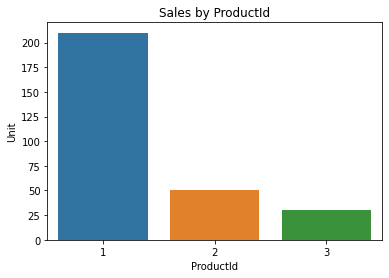

In [13]:
import seaborn as sns
sales_df = sales.DataFrame()
sales_df = sales_df.groupby('ProductId', as_index=False).sum()
ax = sns.barplot(x='ProductId', y='Unit', data=sales_df)
ax.set_title('Sales by ProductId');

## Notebook as a collaboration tool
Notebook is essential to data analysis, as the output is more important than the code itself. You can share the notebook or export it as an html, the result is cached already. They can re-run the notebook to verify the result if they want, but they don't always have to. 
 
However, Notebooks have a lot of reputations, it's not friendly to version control, it's hard to collaborate with notebook. Luckily, there are effort that make collaboration in notebook a lot easier.

Here what I did not show you is that the table has a `is_deleted` column. Some of the records are invalid and we should exclude them. In reality, this happens frequently when you are dealing with hundreds of tables with a lot of dependencies. Often, these tables are made for application, transaction, they do not really think about analytic. Therefore, the one who consume the data need to be a domain expert about these tables, understand the pitfall. This could be the data analyst, SME or the developer of that particular application. It takes many iterations to get the correct data that can be used to produce useful insight.

With ReviewNB, you can publish your result and invite some domain expert to review your analysis. This is where notebook shine, this kind of workflow is not possible with just the SQL script or a screenshot of your finding.

## Step 1 - Review PR on web

![Step1](images/reviewnb/step_1.png "Start a discussion on a cell block")

With ReviewNB, you can view your notebook and add comments on a particular cell, just like code review. This lower the technical barrier as your analyst do not have to understand Git. You can review changes and make discussion on web without the need to pull code at all. As soon as your analyst make suggestion, you can make changes accordingly.

## Step 2 - Review Changes

![Step2](images/reviewnb/step_2.png "Review changes side by side")

Once you have made changes for the notebook, you can review it side by side on ReviewNB. This is very trivial to do it locally without ReviewNB. As Git tracks changes in line level, you can't really read the changes as it consists of a lot of noise. It would also be impossible to view changes about the chart with git.

## Step 3 - Resolve Discussion

![Step3](images/reviewnb/step_3.png "Resolve the discussion.")

Once the changes are reviewed, you can resolve the discussion and share your insight with the team.

Start organizing your analysis today. Make it reproducible, and hopefully others can extend on it easily!